In [1]:
import numpy as np

def rotate(seq, n):
    """ Rotate a sequence by n places.
    If n > 0, rotates the first n elements of the sequence to the back.
    If n < 0, rotates the last n elements of the sequence to the front.
    If n == 0, returns the original sequence.
    """
    n = n % len(seq)
    return seq[n:] + seq[:n]

# page 90 of Vincent de Boer's thesis
# http://www.kbs.twi.tudelft.nl/docs/MSc/2007/deBoer/thesis.pdf
# rotate by -1 because we want the flag as the first piece instead of the last piece
StraDoS2_red = rotate([ chr(i) for i in range(ord('B'), ord('M') + 1) ], -1)
StraDoS2_blu = rotate([ chr(i) for i in range(ord('N'), ord('Y') + 1) ], -1)

# We use 'F' for flag, 'B' for bomb, '1'-'9' for spy-general, and 'X' for marshal.
pieces = [ 'F', 'B' ] + [ str(i) for i in range(1, 10) ] + [ 'X' ]

# A dictionary mapping the StraDoS2 encoding to our conventions.
StraDoS2_decoding = {
    **{ '_' : '*', 'A' : '.' },
    **{ StraDoS2_red[i] : p for i, p in enumerate(pieces) },
    **{ StraDoS2_blu[i] : p for i, p in enumerate(pieces) }
}

def StraDoS2_decode(s):
    """ Decode a StraDoS2 setup string to our conventions. """
    return ''.join([StraDoS2_decoding[c] for c in s])

def mirror(s):
    """ Mirror a setup by reversing its string. """
    return ''.join(reversed(s))

# the board half dimensions of a single player's setup
HALF_HEIGHT = 4
FULL_WIDTH = 10

def to_numpy_array(s):
    """ Convert a setup string to a NumPy array with the board half dimensions. """
    return np.array([ c for c in s ]).reshape(HALF_HEIGHT, FULL_WIDTH)

In [2]:
from lxml import etree
import os

# Requirements:
# 1) extract all .zip files from Gravon in a subdirectory 'games'
#    e.g. using wget -nd -r -P games -A zip http://www.gravon.de/strados2/files/
# 2) unzip all files and delete unwanted game types (barrage, duell, ultimate etc.)
path = 'games'
xml_files = (f for f in os.listdir(path) if f.endswith('.xml'))
setups = []
for f in xml_files:
    filename = os.path.join(path, f)
    tree = etree.parse(filename)
    field = tree.find(".//field")
    if field == None: continue
    content = field.attrib['content']
    red_setup = to_numpy_array(       StraDoS2_decode(content[:40]) )
    blu_setup = to_numpy_array(mirror(StraDoS2_decode(content[60:])))
    setups.append(red_setup)
    setups.append(blu_setup)  

In [3]:
num_setups = len(setups)
placements = { p : sum(s == p for s in setups) for p in pieces }

print("Placement by piece and square")
for p, n in placements.items():
    print(p)
    print(np.round(n / num_setups, 3))
print("")
    
print("Placement by piece and file")
for p, n in placements.items():
    print(p, end=": ")
    print(np.round(np.sum(n, axis=0) / num_setups, 3))
print("")    
    
print("Placement by piece and rank")    
for p, n in placements.items():
    print(p, end=": ")
    print(np.round(np.sum(n, axis=1) / num_setups, 3))    
print("")

Placement by piece and square
F
[[0.09  0.026 0.071 0.132 0.097 0.08  0.161 0.084 0.022 0.121]
 [0.003 0.002 0.01  0.017 0.003 0.003 0.02  0.012 0.002 0.007]
 [0.001 0.    0.002 0.004 0.001 0.    0.003 0.002 0.    0.006]
 [0.002 0.    0.003 0.002 0.    0.    0.002 0.005 0.001 0.002]]
B
[[0.144 0.264 0.293 0.257 0.265 0.267 0.249 0.279 0.281 0.138]
 [0.245 0.157 0.188 0.194 0.171 0.163 0.192 0.189 0.144 0.263]
 [0.113 0.125 0.1   0.073 0.082 0.079 0.073 0.095 0.125 0.112]
 [0.093 0.061 0.072 0.061 0.046 0.06  0.062 0.069 0.056 0.095]]
1
[[0.003 0.004 0.004 0.005 0.006 0.006 0.005 0.005 0.005 0.004]
 [0.011 0.017 0.046 0.072 0.04  0.043 0.079 0.054 0.02  0.013]
 [0.004 0.006 0.069 0.119 0.015 0.016 0.127 0.058 0.007 0.004]
 [0.001 0.001 0.02  0.041 0.001 0.001 0.04  0.025 0.001 0.001]]
2
[[0.197 0.178 0.112 0.104 0.144 0.147 0.102 0.099 0.157 0.19 ]
 [0.197 0.22  0.122 0.109 0.19  0.185 0.108 0.115 0.223 0.193]
 [0.235 0.264 0.177 0.191 0.28  0.246 0.188 0.171 0.269 0.221]
 [0.347 0.305 

Placement by piece and square


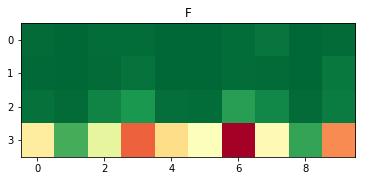

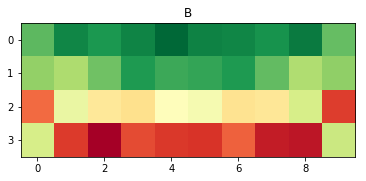

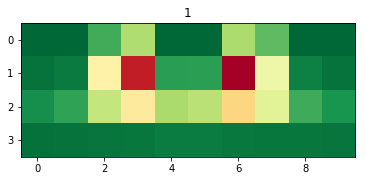

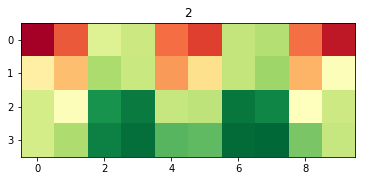

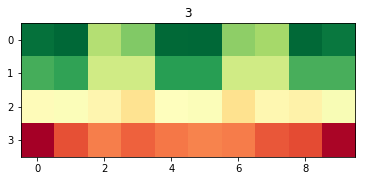

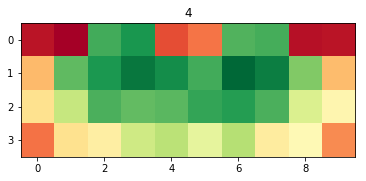

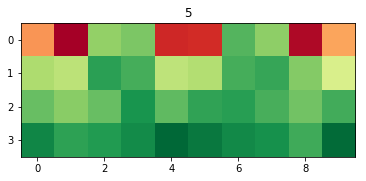

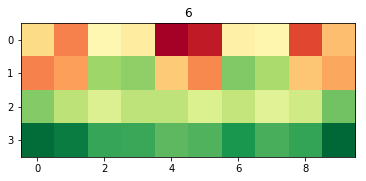

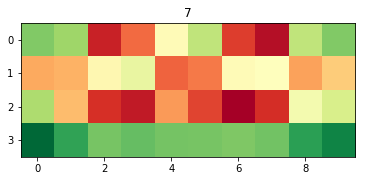

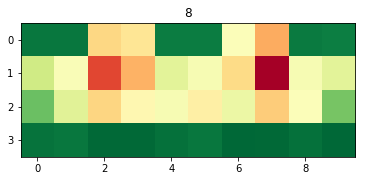

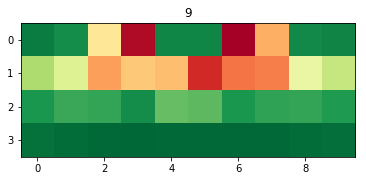

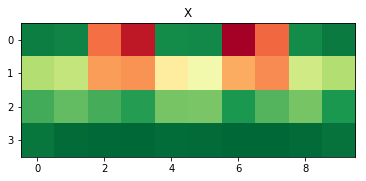


Placement by piece and file


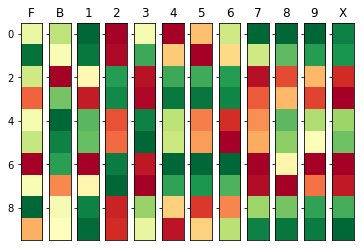

Placement by piece and rank


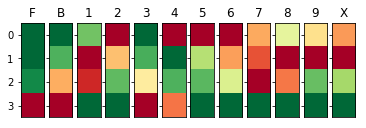

In [63]:
import matplotlib.pyplot as plt

print("Placement by piece and square")
for p, n in placements.items():
    df = np.flip(n, axis=0) / num_setups
    plt.figure()
    plt.title(p)
    plt.imshow(df, cmap='RdYlGn_r')
    plt.show()
    plt.close()
print("")

print("Placement by piece and file")
fig, axs = plt.subplots(1, 12, sharey=True)
for i, p in enumerate(pieces):
    n = placements[p]    
    df = np.transpose(np.sum(n, axis=0).reshape(1, FULL_WIDTH)) / num_setups
    axs[i].set_title(p)
    axs[i].get_xaxis().set_visible(False)
    axs[i].imshow(df, cmap='RdYlGn_r')
plt.show()
plt.close()

print("Placement by piece and rank")
fig, axs = plt.subplots(1, 12, sharey=True)
for i, p in enumerate(pieces):
    n = placements[p]    
    df = np.flip(np.sum(n, axis=1).reshape(HALF_HEIGHT, 1), axis=0) / num_setups
    axs[i].set_title(p)
    axs[i].get_xaxis().set_visible(False)
    axs[i].imshow(df, cmap='RdYlGn_r')
plt.show()
plt.close()
    

In [87]:
placements = { p : np.array([ s == p for s in setups ]) for p in pieces }

In [133]:
n = placements['3']
cnts = np.sum(n, axis=1)
for i in range(10):
    print(np.round(np.bincount(cnts[:,i]) / num_setups, 3))

[0.554 0.403 0.042 0.001 0.   ]
[0.597 0.374 0.028 0.001 0.   ]
[0.501 0.427 0.069 0.003 0.   ]
[0.495 0.435 0.068 0.002]
[0.612 0.359 0.029 0.   ]
[0.62  0.353 0.027 0.    0.   ]
[0.5   0.431 0.066 0.003 0.   ]
[0.501 0.422 0.072 0.005 0.   ]
[0.578 0.389 0.033 0.    0.   ]
[0.553 0.41  0.036 0.001 0.   ]
